# Introduction #

This dataset is obtained from two solar power plants in India. 

Solar energy is one of the more promising renewable sources of energy. It is harvested through solar panels.

Solar panels are made up of arrays of solar modules, which in turn are made up of smaller solar cells. These cells are also known as photovoltaic cells (PV cells). A conventional monocrystalline silicon PV cell is capable of producing around 0.5V of electricity.

The working principle of solar cells is as follows:
1. Photons with sufficient energy (>1.12eV) will dislodge electrons from the silicon.
2. These dislodged electrons will be accelerated from the valence band into the conduction band by the electric field from the PN junction.
3. With the presence of a circuit, DC current flow will be generated.

Each photon has an energy of *E = hc/λ*. As *h* is constant, the parameters resulting in adequately energetic photons are its speed (*c*) and wavelength (*λ*). Ignoring the negligible changes of speed of light in air, the output of a solar cell is affected by the wavelength of light AND the intensity of light (more photons, more energy). Intuitively, the intensity of light varies throughout the day, and the wavelength of light that impedes a solar cell also varies throughout the day due to atmospheric scattering. We will explore how the **irradiation**, **module temperature**, and **ambient temperature**, reflect these changes.

In a typical Solar Energy Generating System (SEGS), solar energy is converted into electricity in the form of Direct Current (**DC**) by the solar panels. This DC is then passed through an **inverter** to convert it to Alternating Current (**AC**) which is better suited for transmission through the centralized power grid.

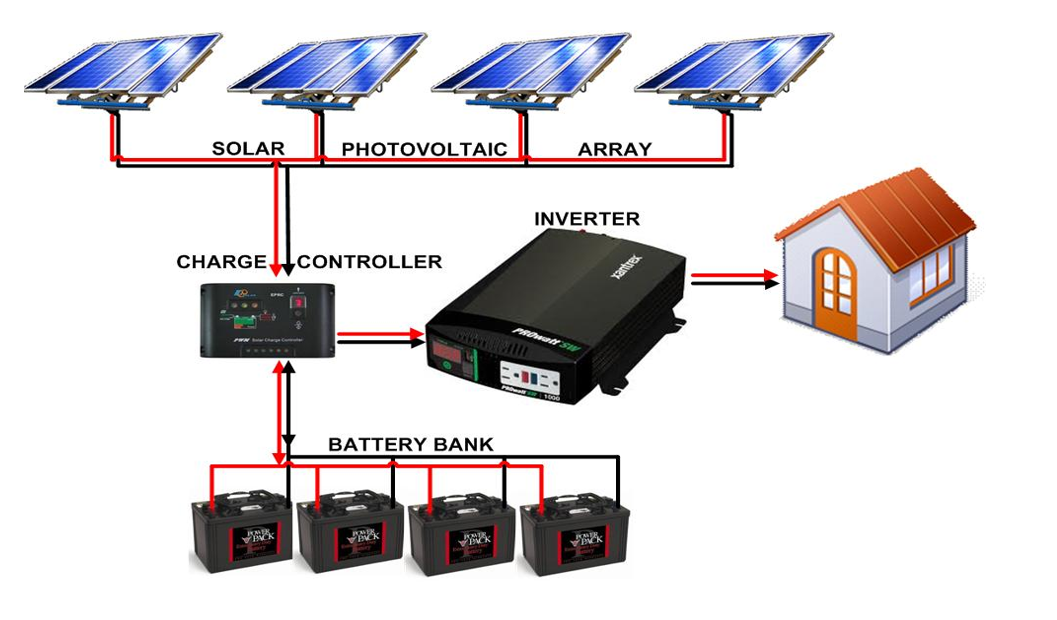
* The above diagram depicts a typical Solar Energy Generating System (SEGS)

We will conduct an exploratory data analysis on this dataset to discover some key relationships, analytics, and correlations between the features provided. We will then make some educated guesses on the underlying factors to the patterns discovered. After that, we will conduct a regression analysis in order to obtain a deeper insight on the interactions and relationships between each feature. Lastly, we will try to make some predictive modelling from our linear regression and obtain a few key metrics to evaluate our model.

# Exploratory Data Analysis

## Import dependencies ##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

## Read CSV ##

In [ ]:
plant1_gen = pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv') 
plant2_gen = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')

In [ ]:
plant1_sens = pd.read_csv('../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')
plant2_sens = pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')

## Data cleaning ##

In [ ]:
plant1_gen

#### Groupby day for summation of yield ####

In [ ]:
plant1_gendaily = plant1_gen.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant1_gendaily

In [ ]:
plant2_gendaily = plant2_gen.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant2_gendaily

#### Convert DATE_TIME into datetime format ####

In [ ]:
#Plant 1 generation data
plant1_gendaily['DATE_TIME'] = pd.to_datetime(plant1_gendaily['DATE_TIME']) # Conversion using Pandas built-in method
plant1_gendaily['TIME'] = plant1_gendaily['DATE_TIME'].dt.time # Creates new column and passes TIME into time 
plant1_gendaily['DATE'] = pd.to_datetime(plant1_gendaily['DATE_TIME'].dt.date) # Creates new column and passes DATE into time 

#Plant 2 generation data
plant2_gendaily['DATE_TIME'] = pd.to_datetime(plant2_gendaily['DATE_TIME']) 
plant2_gendaily['TIME'] = plant2_gendaily['DATE_TIME'].dt.time 
plant2_gendaily['DATE'] = pd.to_datetime(plant2_gendaily['DATE_TIME'].dt.date)

In [ ]:
plant1_gen.info()

In [ ]:
plant1_gendaily.info()

#### Descriptive analytics

In [ ]:
plant1_gendaily.describe()

In [ ]:
plant2_gendaily.describe()

#### Check for missing values ####

In [ ]:
print('Plant 1 Generation Data')
sbn.heatmap(plant1_gen.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

print('Plant 2 Generation Data')
sbn.heatmap(plant2_gen.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

> * There are no missing values. We're good to go.

#### Check for faulty inverters/modules ####

In [ ]:
print('There are {} inverters in Solar Power Plant 1.'.format(plant1_gen['SOURCE_KEY'].nunique()))
print('There are {} inverters in Solar Power Plant 2.'.format(plant2_gen['SOURCE_KEY'].nunique()))

In [ ]:
print('Plant 1 Inverters')
sbn.barplot(x='SOURCE_KEY', y='AC_POWER', data=plant1_gen)
plt.xticks([])
plt.show()

print('Plant 2 Inverters')
sbn.barplot(x='SOURCE_KEY', y='AC_POWER', data=plant2_gen)
plt.xticks([])
plt.show()

> * The inverters in Plant 1 have stable outputs, while the inverters in Plant 2 have varying outputs. Assuming fully functional solar modules, this may be due to faulty inverters. Let's explore further.

## Observe relationship between power generation data features ##

In [ ]:
plant1_gen.columns

In [ ]:
plant1_gendaily.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 5), colormap='Pastel1')
plt.ylabel('DC Power')
plt.xlabel('Time of Day')
plt.title('DC Power against Time for Plant 1')
plt.show()

plant1_gendaily.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 5), colormap='Accent') 
plt.ylabel('AC Power')
plt.xlabel('Time of Day')
plt.title('AC Power against Time for Plant 1')
plt.show()

plant2_gendaily.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 5), colormap='Pastel1')
plt.ylabel('DC Power')
plt.xlabel('Time of Day')
plt.title('DC Power against Time for Plant 2')
plt.show()

plant2_gendaily.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 5), colormap='Accent') 
plt.ylabel('AC Power')
plt.xlabel('Time of Day')
plt.title('AC Power against Time for Plant 2')
plt.show()

> * Power output is generated with the presence of sunlight, which starts at around 0540hrs and ends at around 1800hrs. "Presence of sunlight" is dictated by the intensity of sunlight and the wavelength of sunlight that hits the PV cells. This means that even though there may still be sunlight at 1800hrs, they are diffused sunlight and scattered sunlight that do not have adequate range of wavelength for power generation.
> * Plant 2 exhibits more scattered AC and DC Power values. Inverters may not be faulty but instead the modules are.

In [ ]:
# DC output from solar module
DCcompare = plant1_gendaily.plot(x='TIME', y='DC_POWER', figsize=(15,5), legend=True, style='.', label='Plant 1')
plant2_gendaily.plot(x='TIME', y='DC_POWER', legend=True, style='.', label='Plant 2', ax=DCcompare)
plt.title('DC Power Output for Each Plant')
plt.ylabel('Power')
plt.show()

# AC output from inverter
ACcompare = plant1_gendaily.plot(x='TIME', y='AC_POWER', figsize=(15,5), legend=True, style='.', label='Plant 1')
plant2_gendaily.plot(x='TIME', y='DC_POWER', legend=True, style='.', label='Plant 2', ax=ACcompare)
plt.title('AC Power Output for Each Plant')
plt.ylabel('Power')
plt.show()

> * The DC power output from solar module of Plant 2 is significantly lower than Plant 1, at almost ten times lower. 
> * However, the AC power outputs from both plants are at similar levels, despite the AC output from Plant 2 being more erratic.
> * Another plausible angle is that Plant 1 produces 10 ten times more DC power output.

#### Correlation coefficient and matrix

In [ ]:
g1corr = plant1_gen.drop('PLANT_ID', axis=1).corr()
g2corr = plant2_gen.drop('PLANT_ID', axis=1).corr()

print('Plant 1 Generation Data Correlation Coefficient')
print(g1corr)

print('Plant 2 Generation Data Correlation Coefficient')
print(g2corr)

In [ ]:
g1mask = np.triu(np.ones_like(g1corr, dtype=bool))
g2mask = np.triu(np.ones_like(g2corr, dtype=bool))

cmap = 'magma_r'

f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(g1corr, mask=g1mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(g2corr, mask=g2mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

> * Correlation coefficient between DAILY_YIELD and output (AC_POWER and DC_POWER) for Plant 1 is higher than Plant 2.
> * Higher values mean higher correlation between the pair. 
> * Looking at the correlation between AC_POWER and DC_POWER, the efficiency of the inverters can be estimated: 0.999996 for Plant 1, and 0.999997 for Plant 2.

## Observe relationship between sensor data features ##


#### Groupby day unneeded here, but it's good to remove PLANT_ID and SOURCE_KEY while standardizing variable naming

In [ ]:
plant1_sens

In [ ]:
plant1_sensdaily = plant1_sens.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE',
                                                     'IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()

plant1_sensdaily

In [ ]:
plant2_sensdaily = plant2_sens.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE',
                                                     'IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()

plant2_sensdaily

#### Convert DATE_TIME into datetime format ####

In [ ]:
#Plant 1 sensor data
plant1_sensdaily['DATE_TIME'] = pd.to_datetime(plant1_sensdaily['DATE_TIME']) 
plant1_sensdaily['TIME'] = plant1_sensdaily['DATE_TIME'].dt.time 
plant1_sensdaily['DATE'] = pd.to_datetime(plant1_sensdaily['DATE_TIME'].dt.date)

#Plant 2 sensor data
plant2_sensdaily['DATE_TIME'] = pd.to_datetime(plant2_sensdaily['DATE_TIME']) 
plant2_sensdaily['TIME'] = plant2_sensdaily['DATE_TIME'].dt.time 
plant2_sensdaily['DATE'] = pd.to_datetime(plant2_sensdaily['DATE_TIME'].dt.date)

In [ ]:
plant1_sensdaily.info()

#### Check for missing values ####

In [ ]:
print('Plant 1 Sensor Data')
sbn.heatmap(plant1_sensdaily.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

print('Plant 2 Sensor Data')
sbn.heatmap(plant2_sensdaily.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

There are no missing values. We may proceed.

In [ ]:
plant1_sensdaily.columns

In [ ]:
plant1_sensdaily['DATE'].nunique()

In [ ]:
#Plant 1
#Irradiation
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant1_sensdaily, err_style='band', color='red')

plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Plant 1 Daily Solar Irradiation')
plt.xticks(rotation=45)
plt.show()

#Module Temperature
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', color='blue')

plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Plant 1 Daily Module Temperature')
plt.xticks(rotation=45)
plt.show()

#Ambient Temperature
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', color='green')

plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Plant 1 Daily Ambient Temperature')
plt.xticks(rotation=45)
plt.show()

#Plant 2
#Irradiation
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant2_sensdaily, err_style='band', color='red')

plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Plant 2 Daily Solar Irradiation')
plt.xticks(rotation=45)
plt.show()

#Module Temperature
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', color='blue')

plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Plant 2 Daily Module Temperature')
plt.xticks(rotation=45)
plt.show()

#Ambient Temperature
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', color='green')

plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Plant 2 Daily Ambient Temperature')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plant 1 temperature sensors
tempsens_plant1 = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Module Temperature')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Ambient Temperature', ax=tempsens_plant1)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Module and Ambient Temperatures for Plant 1')
plt.xticks(rotation=45)
plt.show()

# Plant 2 temperature sensors
tempsens_plant2 = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Module Temperature')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Ambient Temperature', ax=tempsens_plant2)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Module and Ambient Temperatures for Plant 2')
plt.xticks(rotation=45)
plt.show()

> * Module Temperature is always higher than Ambient Temperature

In [ ]:
# Comparing both plants
# Daily Irradiation
ambient_compare = sbn.lineplot(x='DATE', y='IRRADIATION', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=ambient_compare)
plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Daily Solar Irradiation for Both Plants')
plt.xticks(rotation=45)
plt.show()

# Daily Module Temperature
modtemp_compare = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=modtemp_compare)
plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Daily Module Temperature for Both Plants')
plt.xticks(rotation=45)
plt.show()

# Daily Ambient Temperature
ambtemp_compare = sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=ambtemp_compare)
plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Daily Ambient Temperature for Both Plants')
plt.xticks(rotation=45)
plt.show()

> * The mean solar irradiation values for both plants are similar.
> * The mean module temperature of Plant 1 is slightly lower than Plant 2 most of the time.
> * The mean ambient temperature of Plant 1 is noticeably lower than Plant 2.
> * Plant 1 is located at a colder region in India as compared to Plant 2. One of the plausible explanations for similar solar irradiation is that Plant 1 is located at a higher location as compared to Plant 2.

In [ ]:
# Plant 1
# Irradiation
plant1_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG') 
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Plant 1 Irradiation against Time')
plt.show()

# Module Temperature
plant1_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5), colormap='Paired') 
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 1 Module Temperature against Time')
plt.show()

# Ambient Temperature
plant1_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5), colormap='summer') 
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 1 Ambient Temperature against Time')
plt.show()

# Plant 2
# Irradiation
plant2_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG') 
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Plant 2 Irradiation against Time')
plt.show()

# Module Temperature
plant2_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5), colormap='Paired') 
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 2 Module Temperature against Time')
plt.show()

# Ambient Temperature
plant2_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5), colormap='summer') 
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 2 Ambient Temperature against Time')
plt.show()


> * Ambient temperature goes down much later in the evening as compared to module temperature. This could mean that the specific heat capacity of the module is much lower than the specific heat capacity of the surrounding atmosphere.

In [ ]:
# Hourly sens for each plant

# Irradiation
irr_hour = plant1_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='IRRADIATION', style='.', label='Plant 2', ax=irr_hour)
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Irradiation for Each Plant')
plt.show()

# Module temperature
modtemp_hour = plant1_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='MODULE_TEMPERATURE', style='.', label='Plant 2', ax=modtemp_hour)
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Module Temperature for Each Plant')
plt.show()

# Ambient temperature
ambtemp_hour = plant1_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='AMBIENT_TEMPERATURE', style='.', label='Plant 2', ax=ambtemp_hour)
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Ambient Temperature for Each Plant')
plt.show()

> * Plant 2 has more extreme values in irradiation.
> * Plant 2 has higher ambient temperature values.

## Merge sensor data and generation data

In [ ]:
mergedata1 = plant1_sensdaily.merge(plant1_gendaily, left_on='DATE_TIME', right_on='DATE_TIME')
mergedata1.head()

In [ ]:
mergedata2 = plant2_sensdaily.merge(plant1_gendaily, left_on='DATE_TIME', right_on='DATE_TIME')
mergedata2.head()

In [ ]:
# Remove unneeded columns

mergedata1.drop(columns =['TIME_x', 'DATE_x', 'TIME_y', 'DATE_y'], inplace=True)
mergedata2.drop(columns =['TIME_x', 'DATE_x', 'TIME_y', 'DATE_y'], inplace=True)

In [ ]:
mergedata1

In [ ]:
mergedata2

In [ ]:
mergedata1.info()

In [ ]:
mergedata2.info()

#### Correlation coefficient for merged data ####

In [ ]:
mergecorr1 = mergedata1.corr()
mergecorr2 = mergedata2.corr()


print('Plant 1 Generation and Sensor Data Correlation Coefficient')
print(mergecorr1)
print('')

print('Plant 2 Generation and Sensor Data Correlation Coefficient')
print(mergecorr2)

In [ ]:
s1mask = np.triu(np.ones_like(mergecorr1, dtype=bool))
s2mask = np.triu(np.ones_like(mergecorr2, dtype=bool))

cmap = 'magma_r'

print('Plant 1')
f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(mergecorr1, mask=s1mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

print('Plant 2')
f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(mergecorr2, mask=s2mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

#### Sorting correlation pairs

In [ ]:
# Plant 1
c1 = mergecorr1.unstack()
sort1 = c1.sort_values(kind="quicksort")
print('Plant 1 Top Correlations:')
print(sort1[22:42])
print('')

# Plant 2
c2 = mergecorr2.unstack()
sort2 = c2.sort_values(kind="quicksort")
print('Plant 2 Top Correlations:')
print(sort2[22:42])

> Ignoring the obvious correlation between AC_POWER and DC_POWER, these are the top correlations with AC_POWER/DC_POWER:

> FACTOR (AC1, DC1, AC2, DC2)
> 1. IRRADIATION (0.996664, 0.996746, 0.924785, 0.924574)
> 2. MODULE_TEMPERATURE (0.959787, 0.959706, 0.877665, 0.877453)
> 3. AMBIENT_TEMPERATURE (0.703721, 0.703512, 0.590186, 0.589997)

> * Plant 2 has a non-trivial lower temperature correlation coefficient than Plant 1.

# Training and Prediction

In [ ]:
mergedata1.columns

In [ ]:
sbn.lmplot(x='AMBIENT_TEMPERATURE', y='AC_POWER', data=mergedata1)
print('Plant 1')
plt.show()

In [ ]:
sbn.lmplot(x='AMBIENT_TEMPERATURE', y='AC_POWER', data=mergedata2)
print('Plant 2')
plt.show()

> * AC_POWER against AMBIENT_TEMPERATURE shows slight linearity.

### Splitting data and fitting into model

#### PLANT 1

In [ ]:
mergedata1.columns

In [ ]:
X = mergedata1[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']] # Features
y = mergedata1['AC_POWER'] # Target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Splits train and test sets

In [ ]:
# Training the model
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression() # creates an instance of LinearRegression() model 

In [ ]:
lm.fit(X_train, y_train) # fit on training data

In [ ]:
print('PLANT 1')
print('The intercept for the linear regression is at', lm.intercept_)
print('The linear regression coefficients are:')

coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
print(coef_df)

#### PLANT 2

In [ ]:
mergedata2.columns

In [ ]:
X2 = mergedata2[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']] # Features
y2 = mergedata2['AC_POWER'] # Target

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3) # Splits train and test sets

In [ ]:
lm2 = LinearRegression()

In [ ]:
lm2.fit(X2_train, y2_train)

In [ ]:
print('PLANT 2')
print('The intercept for the linear regression is at', lm2.intercept_)
print('The linear regression coefficients are:')

coef2_df = pd.DataFrame(lm2.coef_, X2.columns, columns=['Coeff2'])
print(coef2_df)

### Predicting from models

#### PLANT 1

In [ ]:
predictions1 = lm.predict(X_test)
predictions1

In [ ]:
plt.scatter(y_test, predictions1)
plt.title('Actual Solar Output Values vs Predicted Values for Plant 1')
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')

> * Tight distribution indicates good predictions.

#### PLANT 2

In [ ]:
predictions2 = lm2.predict(X2_test)
predictions2

In [ ]:
plt.scatter(y2_test, predictions2)
plt.title('Actual Solar Output Values vs Predicted Values for Plant 2')
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')

> * Slightly scattered distribution indicates suboptimal model.
> * This can be credited to the irregularities in output, possibly brought forth by faulty modules.

### Evaluating the models

In [ ]:
from sklearn import metrics

# PLANT 1
MAE1 = metrics.mean_absolute_error(y_test,predictions1)
MSE1 = metrics.mean_squared_error(y_test,predictions1)
RMSE1 = np.sqrt(metrics.mean_squared_error(y_test,predictions1))
print('Metrics for Plant 1 Linear Model')
print('MAE: ', MAE1)
print('MSE: ',MSE1)
print('RMSE: ', RMSE1)
print()

# PLANT 2
MAE1 = metrics.mean_absolute_error(y2_test,predictions2)
MSE1 = metrics.mean_squared_error(y2_test,predictions2)
RMSE1 = np.sqrt(metrics.mean_squared_error(y2_test,predictions2))
print('Metrics for Plant 2 Linear Model')
print('MAE: ', MAE1)
print('MSE: ',MSE1)
print('RMSE: ', RMSE1)

> * Generally, the lower the MAE, MSE, RMSE values, the higher the precision. RMSE values can be interpreted in the unit of kW. This will be our main metric.

#### Residuals

In [ ]:
sbn.displot((y_test-predictions1), kde=True)
plt.title('Plant 1 Residuals')

> * The residuals show that most points center around 0 and there are some extreme points in the negative.

In [ ]:
sbn.displot((y2_test-predictions2), kde=True)
plt.title('Plant 2 Residuals')

> * The residuals show that the points are normally distributed around 0 with minimal extreme points.

# Key takeaways

1. Plant 1 is located at a colder region with less fluctuation in ambient temperature.
2. Plant 1 has more reliable PV modules, with 10 times more DC output than Plant 2 and higher AC output stability.
3. Plant 1 has higher correlation between output and yield, which means that Plant 1 has a higher overall system efficiency than Plant 2, despite having similar inverter efficiency.
4. Despite recording different temperature levels, both plants seem to receive similar amount of sunlight every day. However Plant 2 is slightly more erratic with more extreme values of irradiation. This could mean that Plant 2 is located at a more cloudy region as compared to Plant 1. By extension, Plant 1 could be located at an elevated location, where less clouds are present and the temperatures are lower. This could also mean that the modules in Plant 2 simply require maintenance.
5. The larger temperatures of Plant 2 mainly result from diffused sunlight, which does not have as much energy and wavelength range to excite the electrons in the PV cells.
6. For Plant 1, a unit increase in irradiation results in roughly 26500.433104kW ± 735.74kW (RMSE) increase in AC output. (Values slightly differ every run)
7. Plant 1 is more predictable than Plant 2, with tighter regression and lower RMSE values.
8. The models can be optimized by addressing the following factors:
* Inadequate features to aid supervised learning. Additional features such as weather data will be helpful in increasing model accuracy.
* Inadequate data points (30 days) which could not provide enough training for highly weather-dependent systems such as solar power plants.
* Faulty modules in Plant 2 provide misleading data, resulting in a loose linear regression.
* Human error in analysis.
9. The following data-driven solutions can be considered to increase overall efficiency of solar power plant:
* Conduct maintenance on Plant 2 solar modules to improve irradiation.
* Increase DC output by increasing the number of solar modules at Plant 2, especially if the plant is located at a cloudy region.

### Post-scriptum

Thank you very much for for reading this analysis. Coming from an Applied Physics background, I am new to data science and this project is my first Kaggle code. It is highly likely that there may be some errors in my analysis, and I would be grateful if you could let me know if you find anything weird! 

Thanks again for your time, and I hope you have a great day.